<a href="https://colab.research.google.com/github/johnpharmd/DS-Sprint-02-Storytelling-With-Data/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.__version__

'0.9.0'

In [3]:
! pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [6]:
income.shape, lifespan.shape, entities.shape, concepts.shape, population.shape

((44268, 3), (44370, 3), (273, 33), (590, 16), (51939, 3))

In [7]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [8]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


In [9]:
concepts.concept.unique()

array(['adults_with_hiv_percent_age_15_49', 'age_at_1st_marriage_women',
       'aged_15_24_employment_rate_percent',
       'aged_15_24_unemployment_rate_percent',
       'aged_15_64_labour_force_participation_rate_percent',
       'aged_15plus_employment_rate_percent',
       'aged_15plus_labour_force_participation_rate_percent',
       'aged_15plus_unemployment_rate_percent',
       'aged_25_54_labour_force_participation_rate_percent',
       'aged_25_54_unemployment_rate_percent',
       'aged_55_64_unemployment_rate_percent',
       'aged_65plus_labour_force_participation_rate_percent',
       'aged_65plus_unemployment_rate_percent',
       'agricultural_land_percent_of_land_area',
       'agricultural_water_withdrawal_percent_of_total',
       'agriculture_percent_of_gdp',
       'agriculture_workers_percent_of_employment', 'aid_given_2007_us',
       'aid_given_per_person_2007_us', 'aid_given_percent_of_gni',
       'aid_received_per_person_current_us',
       'aid_received_perc

In [10]:
concepts.sample(1).T

,480
concept,rank
color,NaN
concept_type,measure
description,NaN
description_long,NaN
domain,NaN
drill_up,NaN
indicator_url,NaN
name,Ranking order
name_catalog,NaN


In [11]:
entities.world_6region.unique()

array(['europe_central_asia', 'america', 'south_asia',
       'sub_saharan_africa', 'middle_east_north_africa',
       'east_asia_pacific', nan], dtype=object)

In [12]:
entities[entities.world_6region == 'europe_central_asia']['name'].unique()

array(['Abkhazia', 'Akrotiri and Dhekelia', 'Åland', 'Albania', 'Andorra',
       'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria',
       'Bosnia and Herzegovina', 'Belarus', 'Channel Islands',
       'Switzerland', 'Czechoslovakia', 'Cyprus', 'Northern Cyprus',
       'Czech Republic', 'Germany', 'East Germany', 'West Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'Faeroe Islands', 'Guernsey', 'Isle of Man', 'United Kingdom',
       'Georgia', 'Gibraltar', 'Greece', 'Greenland', 'Holy See',
       'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Jersey',
       'Kazakhstan', 'Kyrgyz Republic', 'Kosovo', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Monaco', 'Moldova',
       'Macedonia, FYR', 'Malta', 'Montenegro', 'Ngorno-Karabakh',
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Serbia and Montenegro', 'Serbia excluding Kosovo', 'Svalbard',
       'San Marino', 'South Ossetia', 'Serbia', '

In [0]:
df = pd.merge(income, lifespan)
df1 = df.copy()

In [14]:
df1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
df = df1.copy()

In [16]:
df1.shape

(41790, 4)

In [17]:
df.shape

(41790, 4)

In [0]:
df = pd.merge(df, population)


In [0]:
entity_vars = ['country', 'name', 'world_6region']
df = pd.merge(df, entities[entity_vars], 
              how='inner', left_on='geo', right_on='country')

In [20]:
df.shape

(41790, 8)

In [21]:
df.tail()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
41785,zwe,2014,1908,56.99,15411675,zwe,Zimbabwe,sub_saharan_africa
41786,zwe,2015,1891,58.27,15777451,zwe,Zimbabwe,sub_saharan_africa
41787,zwe,2016,1860,59.27,16150362,zwe,Zimbabwe,sub_saharan_africa
41788,zwe,2017,1907,59.80,16529904,zwe,Zimbabwe,sub_saharan_africa
41789,zwe,2018,1952,60.18,16913261,zwe,Zimbabwe,sub_saharan_africa


In [0]:
df.drop(columns=['geo', 'country'], inplace=True)

In [23]:
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [0]:
df = df[df.world_6region == 'europe_central_asia']

In [25]:
df.shape

(10991, 6)

In [0]:
df.rename(columns={'time': 'year',
                   'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
                   'life_expectancy_years': 'lifespan',
                   'population_total': 'population',
                   'name': 'country',
                   'world_6region': 'region'}, inplace=True)

In [27]:
df.head()

,year,income,lifespan,population,country,region
657,1800,667,35.4,410445,Albania,europe_central_asia
658,1801,667,35.4,411734,Albania,europe_central_asia
659,1802,667,35.4,413026,Albania,europe_central_asia
660,1803,667,35.4,414323,Albania,europe_central_asia
661,1804,667,35.4,415624,Albania,europe_central_asia


In [28]:
df.describe()

,year,income,lifespan,population
count,10991.000000,10991.000000,10991.000000,1.099100e+04
mean,1909.301065,7094.231553,48.831910,1.002590e+07
std,63.299275,10491.600486,17.301095,1.811665e+07
min,1800.000000,393.000000,4.050000,9.584000e+03
25%,1854.000000,1428.000000,35.560000,1.097708e+06
50%,1909.000000,2760.000000,41.800000,3.354062e+06
75%,1964.000000,7761.500000,66.910000,8.914314e+06
max,2018.000000,99034.000000,83.450000,1.484314e+08


In [29]:
df.describe(exclude=[np.number])

,country,region
count,10991,10991
unique,51,1
top,Austria,europe_central_asia
freq,219,10991


# Plot dataviz

In [0]:
years = [1906, 1912, 1918, 1924, 1930]
eurasia_circa_ww1 = df[df.year.isin(years)]
eurasia_circa_ww1.sample(10)

In [0]:
!pip install --upgrade seaborn

In [0]:
import seaborn as sns
import random

In [0]:
rand_countries = [random.choice(eurasia_circa_ww1.country.unique()) for i in range(7)]

six_year = eurasia_circa_ww1[eurasia_circa_ww1.country.isin(rand_countries)]

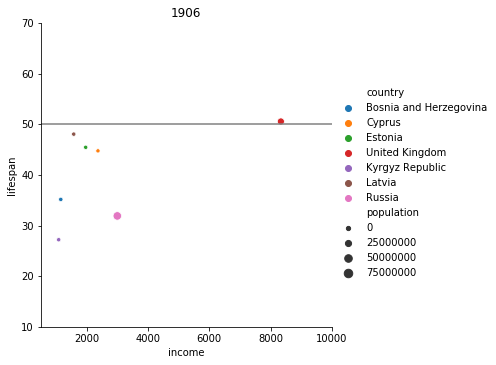

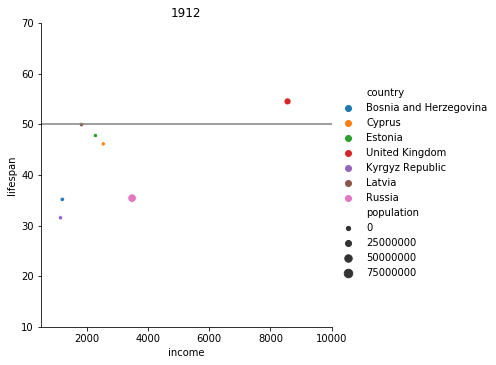

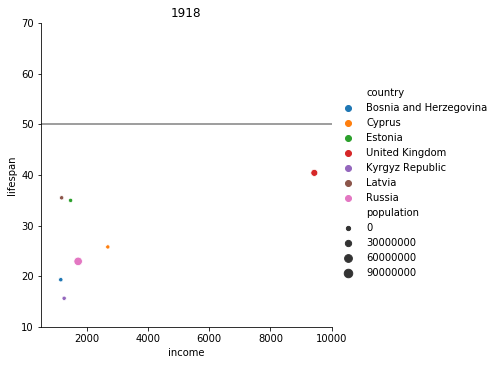

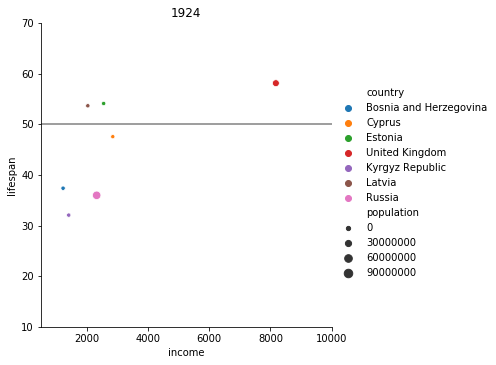

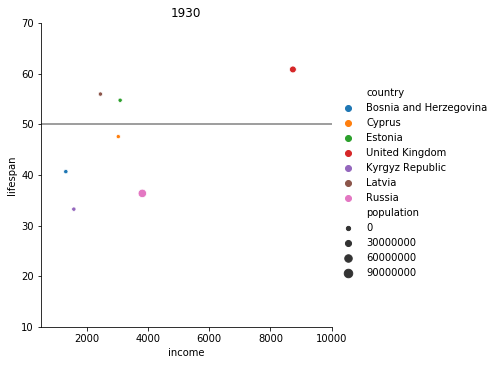

In [64]:
for year in years:
  sns.relplot(x='income', y='lifespan', hue='country', size='population',
              data=six_year[six_year.year==year])
  plt.xlim(500, 10000)
  plt.ylim(10, 70)
  plt.title(year)
  plt.axhline(y=50, color='grey');